In [129]:
import pandas as pd
import numpy as np
import csv
import nltk
import json
import matplotlib as plt
import seaborn as sns

In [231]:
df_88 = pd.read_csv('../../Test-Data/pre-final-88-genre.csv')
df_88.head(1)

,Unnamed: 0,track,album,artist,popularity,featured,release_date,track_id,danceability,energy,...,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics,filtered_lyrics,genre
0,0,BIBI Vengeance,Lowlife Princess: Noir,BIBI,76,BIBI,2022-11-17,0ra3bPUOj2YnY4FJHXtgHZ,0.442,0.748,...,0.0895,0.000128,0.0642,0.408,99.981,165135,4,"[비비 ""나쁜년"" 가사][Verse 1]들어오라 해눈을 깔어 왜비밀로 할게네 부정과...",Watch me danceWatch me sing Watch me danceWat...,"['R&B', 'K-R&B', 'Reggaetón', 'South Korea', '..."


In [247]:
new_df88 = pd.DataFrame({'artist_name': df_88['artist'], 'lyrics': df_88['filtered_lyrics']})
new_df88.head(1)

,artist_name,lyrics
0,BIBI,Watch me danceWatch me sing Watch me danceWat...


In [248]:
# Remove "missing" songs
new_df88 = new_df88.loc[new_df88['lyrics'] != 'missing']
len(new_df88.loc[new_df88['lyrics'] == 'missing'])

0

In [249]:
new_df88 = new_df88.loc[new_df88['lyrics'] != ' ']
len(new_df88.loc[new_df88['lyrics'] == ' '])
new_df88.reset_index(drop=True, inplace=True)
new_df88

,artist_name,lyrics
0,BIBI,Watch me danceWatch me sing Watch me danceWat...
1,BIBI,Dice and Ice cube Home girls bitches Spin it ...
2,BIBI,champagne It might be pretty it might be beau...
3,BIBI,BAD SAD AND MAD Refrain You blued my bruisePi...
4,BIBI,I like that I like that Let s ride Oh oh oh o...
...,...,...
272,Warren Hue,Ayy ayy ayyWent to Los AngelesDissin all these...
273,Warren Hue,Warren Hue I wanna be like I ve been stuck i...
274,Warren Hue,Uh uh ayy ya yaUh uh turn turn ya yaT turn ya ...
275,Warren Hue,Won t you run away with me this evening Oh tru...


In [235]:
# Add space in between words and lowercase
def correct_format(lyric_str):
    lyric_str = lyric_str.lower()
    new_str = ""
    for index in range(0, len(lyric_str)):
        if index+1 == len(lyric_str):
            new_str = new_str + lyric_str[index]
            break
        else:
            prev = lyric_str[index]
            after = lyric_str[index+1]
            if prev.islower() and after.isupper():
                new_str = new_str + prev + " "
            else:
                new_str = new_str + prev
    return new_str

In [250]:
new_df88['lyrics'] = new_df88['lyrics'].apply(lambda x: correct_format(x))

In [197]:
# Tokenize lyrics
new_df88['lyrics_tokenized']=new_df88['lyrics'].apply(lambda x: x.split())
new_df88


C:\Users\krist\AppData\Local\Temp\ipykernel_49012\2488739413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df88['lyrics_tokenized']=new_df88['lyrics'].apply(lambda x: x.split())


,artist_name,lyrics,lyrics_tokenized
0,BIBI,watch me dancewatch me sing watch me dancewat...,"[watch, me, dancewatch, me, sing, watch, me, d..."
1,BIBI,dice and ice cube home girls bitches spin it ...,"[dice, and, ice, cube, home, girls, bitches, s..."
2,BIBI,champagne it might be pretty it might be beau...,"[champagne, it, might, be, pretty, it, might, ..."
3,BIBI,bad sad and mad refrain you blued my bruisepi...,"[bad, sad, and, mad, refrain, you, blued, my, ..."
4,BIBI,i like that i like that let s ride oh oh oh o...,"[i, like, that, i, like, that, let, s, ride, o..."
...,...,...,...
272,Warren Hue,ayy ayy ayywent to los angelesdissin all these...,"[ayy, ayy, ayywent, to, los, angelesdissin, al..."
273,Warren Hue,warren hue i wanna be like i ve been stuck i...,"[warren, hue, i, wanna, be, like, i, ve, been,..."
274,Warren Hue,uh uh ayy ya yauh uh turn turn ya yat turn ya ...,"[uh, uh, ayy, ya, yauh, uh, turn, turn, ya, ya..."
275,Warren Hue,won t you run away with me this evening oh tru...,"[won, t, you, run, away, with, me, this, eveni..."


In [198]:
# Save as csv file
new_df88.to_csv('lyrics_88.csv')

In [199]:
df_88['artist'].unique()

array(['BIBI', 'CHUNG HA', 'Keith Ape', 'Dumbfoundead', 'Guapdad 4000',
       'Rich Brian', 'Higher Brothers', 'Jackson Wang', 'Joji',
       'Lexie Liu', 'Mili', 'Seori', 'Stephanie Poetri', 'Warren Hue'],
      dtype=object)

In [200]:
# Find the frequency of words for Rich Brian and Joji
richbrian_lyrics = new_df88.loc[new_df88['artist_name'] == 'Rich Brian']
joji_lyrics = new_df88.loc[new_df88['artist_name'] == 'Joji']

In [201]:
# Function to combine all words into one list
def comb_words(df):
    word_list = []
    for rows in df:
        word_list.extend(rows)
    return word_list

In [202]:
rb_all_words = comb_words(richbrian_lyrics['lyrics_tokenized'])
joji_all_words = comb_words(joji_lyrics['lyrics_tokenized'])

In [203]:
rb_word_dist = nltk.FreqDist(rb_all_words) 
rb_words_df = pd.DataFrame({'word':list(rb_word_dist.keys()), 'count':list(rb_word_dist.values())}).sort_values(by='count', ascending=False)
joji_word_dist = nltk.FreqDist(joji_all_words) 
joji_words_df = pd.DataFrame({'word':list(joji_word_dist.keys()), 'count':list(joji_word_dist.values())}).sort_values(by='count', ascending=False) 

In [204]:
rb_words_df

,word,count
9,i,510
55,the,296
14,my,227
23,m,205
30,to,201
...,...,...
1062,topicwhile,1
1061,trendin,1
1060,continentthese,1
1059,king,1


In [12]:
# Remove stop words
from nltk.corpus import stopwords
nltk.download("stopwords")
stop = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krist\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
new_rb_words_df = rb_words_df.loc[rb_words_df['word'].isin(stop) == False]
new_joji_words_df = joji_words_df.loc[joji_words_df['word'].isin(stop)==False]
new_rb_words_df.reset_index(drop=True)
new_joji_words_df.reset_index(drop=True)

,word,count
0,know,45
1,gimme,29
2,like,29
3,wanna,28
4,love,25
...,...,...
762,whateverburning,1
763,r,1
764,whenev,1
765,tter,1


<AxesSubplot:xlabel='count', ylabel='word'>

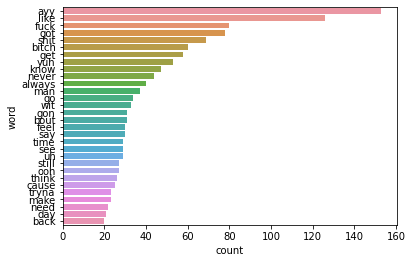

In [14]:
# Visualize the words
# Rich Brian
sns.barplot(data=new_rb_words_df[0:30], x= "count", y = "word") 

<AxesSubplot:xlabel='count', ylabel='word'>

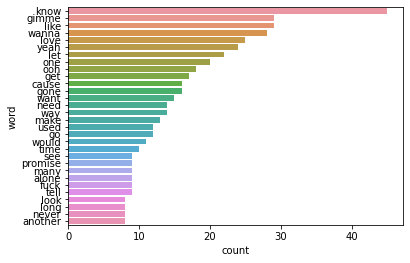

In [15]:
# Joji
sns.barplot(data=new_joji_words_df[0:30], x= "count", y = "word") 

# Bag of Words and Naive Bayes & Random Forest Algorithm to Predit Artist based on Lyric Sentiment

In [16]:
# Import libraries
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

In [349]:
df_88 = pd.read_csv('formatted_lyrics_88.csv')
df_88.head()

,Unnamed: 0.1,Unnamed: 0,track,album,artist,popularity,featured,release_date,track_id,danceability,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics,filtered_lyrics,genre,formatted_lyrics
0,0,0,BIBI Vengeance,Lowlife Princess: Noir,BIBI,76,BIBI,2022-11-17,0ra3bPUOj2YnY4FJHXtgHZ,0.442,...,0.000128,0.0642,0.408,99.981,165135,4,"[비비 ""나쁜년"" 가사][Verse 1]들어오라 해눈을 깔어 왜비밀로 할게네 부정과...",Watch me danceWatch me sing Watch me danceWat...,"['R&B', 'K-R&B', 'Reggaetón', 'South Korea', '...","\n[ """" ]\n\n[Verse ]\n \n[Pre-Chorus]\nWatch m..."
1,1,1,KAZINO,KAZINO,BIBI,68,BIBI,2020-04-29,245onUPHGD1DYuiacxTuW0,0.625,...,0.000000,0.1100,0.263,133.041,185947,4,"[비비 ""사장님 도박은 재미로 하셔야 합니다"" 가사][Verse 1]Dice and...",Dice and Ice cube Home girls bitches Spin it ...,"['R&B', 'South Korea', 'Trap', 'Korean']","\n[ "" "" ]\n\n[Verse ]\nDice and Ice cube \nHom..."
2,2,2,Animal Farm,Animal Farm,BIBI,67,BIBI,2022-09-27,3gAXVQOR0h7Ks71lsr5MFZ,0.617,...,0.000006,0.5500,0.375,107.971,203946,3,"[비비 ""가면무도회"" 가사][Verse 1]죄악의 단어위선의 가면넘쳐흐르는 무도회장...",champagne It might be pretty it might be beau...,"['R&B', 'Korean', 'K-R&B', 'K-Solo', 'South Ko...","\n[ """" ]\n\n[Verse ]\n champagne \n[Pre-Chorus..."
3,3,3,BAD SAD AND MAD,Life is a Bi…,BIBI,66,BIBI,2021-04-28,0zPbUxvYRlCGwruakkXPLI,0.746,...,0.000190,0.0904,0.638,90.013,154988,4,"[비비 ""BAD SAD AND MAD"" 가사][Refrain]You blued my...",BAD SAD AND MAD Refrain You blued my bruisePi...,"['R&B', 'K-R&B', 'Korean', 'K-Solo', 'South Ko...","\n[ ""BAD SAD AND MAD"" ]\n\n[Refrain]\nYou blue..."
4,5,5,Restless,LISTEN 035 Restless,BIBI,62,BIBI,2020-02-02,4AHNi316rl3KI3hKIsdxZe,0.575,...,0.000112,0.1150,0.298,89.985,267080,4,"[비비 ""신경쓰여"" 가사][Verse 1]불 꺼진 방안 뒹굴다전화는 왜 잠만 잘 자...",,"['R&B', 'South Korea', 'K-R&B', 'Korean']","\n[ """" ]\n\n[Verse ]\n \n[Pre-Chorus]\n \n[Cho..."


In [178]:
df_88['artist'].value_counts()

CHUNG HA            47
Rich Brian          27
Warren Hue          24
Jackson Wang        23
Joji                22
Dumbfoundead        21
BIBI                19
Lexie Liu           17
Higher Brothers     16
Keith Ape           16
Stephanie Poetri    14
Guapdad 4000        13
Mili                13
Seori                9
Name: artist, dtype: int64

In [350]:
# Encode Artist names
artist_code = {}
num = 0
for name in df_88['artist'].unique():
    artist_code.update({name: num})
    num+=1
artist_code_dict={'artist': artist_code}
print(artist_code_dict)


{'artist': {'BIBI': 0, 'CHUNG HA': 1, 'Dumbfoundead': 2, 'Rich Brian': 3, 'Guapdad 4000': 4, 'Higher Brothers': 5, 'Jackson Wang': 6, 'Joji': 7, 'Keith Ape': 8, 'Lexie Liu': 9, 'Mili': 10, 'Seori': 11, 'Stephanie Poetri': 12, 'Warren Hue': 13}}


In [351]:
# Create a column with artist codes
updated_df = df_88.replace(artist_code_dict)
updated_df.head()

,Unnamed: 0.1,Unnamed: 0,track,album,artist,popularity,featured,release_date,track_id,danceability,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics,filtered_lyrics,genre,formatted_lyrics
0,0,0,BIBI Vengeance,Lowlife Princess: Noir,0,76,BIBI,2022-11-17,0ra3bPUOj2YnY4FJHXtgHZ,0.442,...,0.000128,0.0642,0.408,99.981,165135,4,"[비비 ""나쁜년"" 가사][Verse 1]들어오라 해눈을 깔어 왜비밀로 할게네 부정과...",Watch me danceWatch me sing Watch me danceWat...,"['R&B', 'K-R&B', 'Reggaetón', 'South Korea', '...","\n[ """" ]\n\n[Verse ]\n \n[Pre-Chorus]\nWatch m..."
1,1,1,KAZINO,KAZINO,0,68,BIBI,2020-04-29,245onUPHGD1DYuiacxTuW0,0.625,...,0.000000,0.1100,0.263,133.041,185947,4,"[비비 ""사장님 도박은 재미로 하셔야 합니다"" 가사][Verse 1]Dice and...",Dice and Ice cube Home girls bitches Spin it ...,"['R&B', 'South Korea', 'Trap', 'Korean']","\n[ "" "" ]\n\n[Verse ]\nDice and Ice cube \nHom..."
2,2,2,Animal Farm,Animal Farm,0,67,BIBI,2022-09-27,3gAXVQOR0h7Ks71lsr5MFZ,0.617,...,0.000006,0.5500,0.375,107.971,203946,3,"[비비 ""가면무도회"" 가사][Verse 1]죄악의 단어위선의 가면넘쳐흐르는 무도회장...",champagne It might be pretty it might be beau...,"['R&B', 'Korean', 'K-R&B', 'K-Solo', 'South Ko...","\n[ """" ]\n\n[Verse ]\n champagne \n[Pre-Chorus..."
3,3,3,BAD SAD AND MAD,Life is a Bi…,0,66,BIBI,2021-04-28,0zPbUxvYRlCGwruakkXPLI,0.746,...,0.000190,0.0904,0.638,90.013,154988,4,"[비비 ""BAD SAD AND MAD"" 가사][Refrain]You blued my...",BAD SAD AND MAD Refrain You blued my bruisePi...,"['R&B', 'K-R&B', 'Korean', 'K-Solo', 'South Ko...","\n[ ""BAD SAD AND MAD"" ]\n\n[Refrain]\nYou blue..."
4,5,5,Restless,LISTEN 035 Restless,0,62,BIBI,2020-02-02,4AHNi316rl3KI3hKIsdxZe,0.575,...,0.000112,0.1150,0.298,89.985,267080,4,"[비비 ""신경쓰여"" 가사][Verse 1]불 꺼진 방안 뒹굴다전화는 왜 잠만 잘 자...",,"['R&B', 'South Korea', 'K-R&B', 'Korean']","\n[ """" ]\n\n[Verse ]\n \n[Pre-Chorus]\n \n[Cho..."


In [352]:
np.bincount(updated_df.artist)

array([19, 47, 21, 27, 13, 16, 23, 22, 16, 17, 13,  9, 14, 24],
      dtype=int64)

In [353]:
# Drop any missing values
no_missing_df = updated_df.dropna()
print(len(no_missing_df), len(updated_df))

281 281


In [291]:
from string import ascii_letters, punctuation

In [313]:
# Clean data
df_explode = updated_df.assign(formatted_lyrics=updated_df.formatted_lyrics.str.split("\n")).explode('formatted_lyrics')
df_explode.dropna(inplace=True)
df_explode.reset_index(drop = True, inplace=True)


row_drop = []
items_to_drop = ['\n', "[", "]"]
watdis=df_explode.formatted_lyrics[4]
watdis2 = df_explode.formatted_lyrics[106]

letters = set(ascii_letters)

for row in df_explode['formatted_lyrics']:
    if len(row) == 0:
        row_drop.append(row)
    elif (row in (letters) == False):
        row_drop.append(row)
    elif row == watdis or row == watdis2:
        row_drop.append(row)
    else:
        for char in row:
            if char in items_to_drop:
                row_drop.append(row)
                break

df_clean = df_explode.loc[df_explode['formatted_lyrics'].isin(row_drop) == False] 
#dup_test1.drop(row_drop, axis = 0, inplace=True)
df_clean.head(1)
print(len(df_clean), len(df_explode))

7461 9476


In [316]:
df_clean['formatted_lyrics']

6                                          Watch me dance
7                                          Watch me sing 
8                                          Watch me dance
9                                          Watch me sing 
13                               I got mercy, I got grace
                              ...                        
9470    Will you spend the night doing some dumb shit?...
9471                 (Jaded off your love, faded off you)
9472                                            Would you
9473    Would you tell me you love me back?(Jaded off ...
9474                                       (Jaded, oh no)
Name: formatted_lyrics, Length: 7461, dtype: object

In [340]:
np.bincount(df_clean['artist'])

array([ 248,  607,  797, 1047,  489,  354,  776,  566,  450,  345,  403,
        148,  398,  833], dtype=int64)

In [377]:
df_artist_lyric = df_clean[['artist', 'formatted_lyrics']].reset_index(drop=True)
df_artist_lyric

,artist,formatted_lyrics
0,0,Watch me dance
1,0,Watch me sing
2,0,Watch me dance
3,0,Watch me sing
4,0,"I got mercy, I got grace"
...,...,...
7456,13,Will you spend the night doing some dumb shit?...
7457,13,"(Jaded off your love, faded off you)"
7458,13,Would you
7459,13,Would you tell me you love me back?(Jaded off ...


In [379]:
# Save csv file
df_artist_lyric.to_csv('lyrics88_by_line.csv')

In [317]:
# Vectorize the lyrics
vect = CountVectorizer()

In [334]:
X_train, X_test, y_train, y_test = train_test_split(df_clean['formatted_lyrics'], df_clean['artist'], random_state=25)

In [335]:
print(f"train: {np.bincount(y_train)}")
print(f"test: {np.bincount(y_test)}")

train: [181 456 585 794 370 253 587 412 348 255 303 111 311 629]
test: [ 67 151 212 253 119 101 189 154 102  90 100  37  87 204]


In [336]:
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [337]:
feature_names = vect.get_feature_names()
print(f"Num Features: {len(feature_names)}")

Num Features: 4556


c:\Users\krist\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [338]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
print(f"Training score: {nb.score(X_train, y_train)}")
print(f"Testing score: {nb.score(X_test, y_test)}")

Training score: 0.6366398570151921
Testing score: 0.40514469453376206


In [341]:
# Test Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [424]:
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.9824843610366398
Testing Score: 0.5080385852090032


In [17]:
# Test the model of the generated lyrics
rb_hypetime = pd.read_csv("rb_hypetime.csv")
joji_ye = pd.read_csv("Joji_YoungEnergy.csv")

In [19]:
rb_hypetime

,Unnamed: 0,artist,formatted_lyrics,lyrics_tokenized
0,0,Rich Brian,"If I want the hype, I'll get the hype (Uh)","[If, I, want, the, hype,, I'll, get, the, hype..."
1,1,Rich Brian,"If I want the money, well, then I'ma get the m...","[If, I, want, the, money,, well,, then, I'ma, ..."
2,2,Rich Brian,If I want a bad bitch then I'ma get a bad bitc...,"[If, I, want, a, bad, bitch, then, I'ma, get, ..."
3,3,Rich Brian,I don't need your opinion 'cause this ain't ab...,"[I, don't, need, your, opinion, 'cause, this, ..."
4,4,Rich Brian,"I was born in ' , but I'm living in ' now (Now)","[I, was, born, in, ', ,, but, I'm, living, in,..."
5,5,Rich Brian,"You don't know me, bitch just follow what they...","[You, don't, know, me,, bitch, just, follow, w..."
6,6,Rich Brian,I'm so focused on where I'm going that my eyes...,"[I'm, so, focused, on, where, I'm, going, that..."
7,7,Rich Brian,When you ready for me then let me know (Let me...,"[When, you, ready, for, me, then, let, me, kno..."
8,8,Rich Brian,When you ready to drop then let me show (Show),"[When, you, ready, to, drop, then, let, me, sh..."
9,9,Rich Brian,When you ready for this shit then let's go (Le...,"[When, you, ready, for, this, shit, then, let'..."


In [422]:
# Encode the artist name
rb_hypetime = rb_hypetime.replace(artist_code_dict)
joji_ye = joji_ye.replace(artist_code_dict)
joji_ye.rename(columns={'value':'formatted_lyrics'}, inplace = True)
print(rb_hypetime)
print(joji_ye)

    Unnamed: 0  artist                                   formatted_lyrics
0            0       3         If I want the hype, I'll get the hype (Uh)
1            1       3  If I want the money, well, then I'ma get the m...
2            2       3  If I want a bad bitch then I'ma get a bad bitc...
3            3       3  I don't need your opinion 'cause this ain't ab...
4            4       3    I was born in ' , but I'm living in ' now (Now)
5            5       3  You don't know me, bitch just follow what they...
6            6       3  I'm so focused on where I'm going that my eyes...
7            7       3  When you ready for me then let me know (Let me...
8            8       3     When you ready to drop then let me show (Show)
9            9       3  When you ready for this shit then let's go (Le...
10          10       3  Fuck what these niggas talk'Cause when they se...
    Unnamed: 0  artist                                   formatted_lyrics
0            0       7                

In [423]:
# Test the Random Forest model on the data
rb_X_test = vect.transform(rb_hypetime['formatted_lyrics'])
joji_X_test = vect.transform(joji_ye['formatted_lyrics'])

In [429]:
rb_predict = clf.predict(rb_X_test)
joji_predict = clf.predict(joji_X_test)
rb_actual = rb_hypetime['artist']
joji_actual = joji_ye['artist']

In [430]:
joji_ye['predicted'] = joji_predict
rb_hypetime['predicted'] = rb_predict

In [431]:
rb_hypetime

,Unnamed: 0,artist,formatted_lyrics,predicted
0,0,3,"If I want the hype, I'll get the hype (Uh)",2
1,1,3,"If I want the money, well, then I'ma get the m...",5
2,2,3,If I want a bad bitch then I'ma get a bad bitc...,3
3,3,3,I don't need your opinion 'cause this ain't ab...,7
4,4,3,"I was born in ' , but I'm living in ' now (Now)",7
5,5,3,"You don't know me, bitch just follow what they...",7
6,6,3,I'm so focused on where I'm going that my eyes...,4
7,7,3,When you ready for me then let me know (Let me...,7
8,8,3,When you ready to drop then let me show (Show),2
9,9,3,When you ready for this shit then let's go (Le...,6


In [432]:
joji_ye

,Unnamed: 0,artist,formatted_lyrics,predicted
0,0,7,"You left me here, I'm in the dark",3
1,1,7,"I played your song, it reminded me of us",10
2,2,7,Now I'm reminiscing on the past,2
3,3,7,You said that you were leaving and I didn't re...,13
4,4,7,I trusted you like a fool with my young energy...,1
5,5,7,You played me like a pro with your old tricks(...,6
6,6,7,So why did I believe?(Why did I believe?),7
7,7,7,"Ooh, ooh-ooh-ooh-ooh, ooh-ooh-ooh-ooh-ooh-ooh-...",6
8,8,7,"Ooh, ooh-ooh-ooh-ooh, ooh (What was it for?)",6
9,9,7,"Ooh, oohl (I still wanna know what went throug...",1


In [441]:
# Naive Bayes
print(f"Rich Brian Accuracy score: {nb.score(rb_X_test, rb_actual)}")
print(f"Joji Accuracy score: {nb.score(joji_X_test, joji_actual)}")

Rich Brian Accuracy score: 0.8181818181818182
Joji Accuracy score: 0.2727272727272727


In [440]:
print(f'Rich Brian Accuracy Score: {clf.score(rb_X_test, rb_actual)}')
print(f'Joji Accuracy Score: {clf.score(joji_X_test, joji_actual)}')

Rich Brian Accuracy Score: 0.18181818181818182
Joji Accuracy Score: 0.09090909090909091


Artist Word Heatmap

In [ ]:
# Tokenize lyrics
rb_hypetime['lyrics_tokenized']=rb_hypetime['formatted_lyrics'].apply(lambda x: x.split())
joji_ye['lyrics_tokenized']=joji_ye['formatted_lyrics'].apply(lambda x: x.split())

In [21]:
rb_hypetime

,Unnamed: 0,artist,formatted_lyrics,lyrics_tokenized
0,0,Rich Brian,"If I want the hype, I'll get the hype (Uh)","[If, I, want, the, hype,, I'll, get, the, hype..."
1,1,Rich Brian,"If I want the money, well, then I'ma get the m...","[If, I, want, the, money,, well,, then, I'ma, ..."
2,2,Rich Brian,If I want a bad bitch then I'ma get a bad bitc...,"[If, I, want, a, bad, bitch, then, I'ma, get, ..."
3,3,Rich Brian,I don't need your opinion 'cause this ain't ab...,"[I, don't, need, your, opinion, 'cause, this, ..."
4,4,Rich Brian,"I was born in ' , but I'm living in ' now (Now)","[I, was, born, in, ', ,, but, I'm, living, in,..."
5,5,Rich Brian,"You don't know me, bitch just follow what they...","[You, don't, know, me,, bitch, just, follow, w..."
6,6,Rich Brian,I'm so focused on where I'm going that my eyes...,"[I'm, so, focused, on, where, I'm, going, that..."
7,7,Rich Brian,When you ready for me then let me know (Let me...,"[When, you, ready, for, me, then, let, me, kno..."
8,8,Rich Brian,When you ready to drop then let me show (Show),"[When, you, ready, to, drop, then, let, me, sh..."
9,9,Rich Brian,When you ready for this shit then let's go (Le...,"[When, you, ready, for, this, shit, then, let'..."


In [22]:
ht_all_words = comb_words(rb_hypetime['lyrics_tokenized'])
ht_wordDist = nltk.FreqDist(ht_all_words)

In [23]:
ht_words_df = pd.DataFrame({'word':list(ht_wordDist.keys()), 'count':list(ht_wordDist.values())}).sort_values(by='count', ascending=False)

## Testing Accuracy Function on Rich Brian - Hype Time

In [24]:
rb_words_df

,word,count
9,i,528
55,the,300
14,my,243
23,m,213
48,a,212
...,...,...
1121,topicwhile,1
1120,trendin,1
1119,continentthese,1
1118,king,1


In [692]:
rb_words_df.head()

,word,count
9,i,663
56,the,307
14,my,258
31,you,237
12,it,220


In [25]:
# Convert rb_words_df to dictionary with the following format {'col1_val': 'col2_val'}
def dict_convert(df_col1, df_col2):
    word_dict = {}
    for row in range(0, len(df_col1)):
        word = df_col1[row]
        wght = df_col2[row]
        word_dict.update({word:wght})
    return word_dict

# rb_words_dict = {}
# for row in range(0, len(rb_words_df)):
#     word = rb_words_df.word[row]
#     wght = rb_words_df.weight[row]
#     rb_words_dict.update({word:wght})
# rb_words_dict

rb_words_dict = dict_convert(rb_words_df['word'], rb_words_df['count'])
rb_words_dict

{'intro': 4,
 'rich': 13,
 'brian': 14,
 'ayy': 153,
 'chorus': 8,
 'uh': 29,
 'always': 40,
 'workin': 5,
 'hard': 7,
 'i': 528,
 'just': 89,
 'got': 78,
 'it': 191,
 'in': 117,
 'my': 243,
 'genes': 4,
 'think': 26,
 'so': 39,
 'much': 12,
 'brain': 7,
 'is': 61,
 'burnin': 5,
 'calories': 4,
 'm': 213,
 'mostly': 4,
 'quiet': 5,
 'but': 56,
 'wildin': 4,
 'when': 56,
 'drink': 4,
 'to': 203,
 'you': 196,
 's': 115,
 'fantasies': 4,
 'me': 139,
 'last': 5,
 'week': 5,
 'don': 92,
 't': 201,
 'never': 44,
 'stress': 5,
 'none': 5,
 'of': 57,
 'that': 124,
 'shit': 69,
 'from': 29,
 'yesterdayat': 4,
 'nine': 6,
 'a': 212,
 'date': 6,
 'told': 15,
 'her': 20,
 'she': 43,
 'could': 15,
 'pick': 5,
 'the': 300,
 'placedon': 4,
 'tell': 12,
 'we': 58,
 're': 28,
 'same': 7,
 'little': 9,
 'bitch': 60,
 'this': 55,
 'night': 8,
 'and': 118,
 'dayi': 5,
 'thought': 13,
 'was': 29,
 'bali': 4,
 'feel': 30,
 'like': 126,
 'holidays': 4,
 'spent': 9,
 'day': 21,
 'with': 87,
 'smile': 7,
 'sou

In [27]:
new_rb_words_dict = dict_convert(list(new_rb_words_df['word']), list(new_rb_words_df['count']))

In [80]:
def ratio_words(sentence, word_bank, show_shared = True): 
    # if show_shared is True, return the shared words list (default); if false, do not return shared word list

    words = sentence.lower().split()
    
    #Remove stop words
    new_list = []
    stop = set(stopwords.words("english"))
    for word in words:
        if word not in stop:
            new_list.append(word)

    shared_words = []
    num_words = len(new_list)
    sum = 0
    for word in new_list:
        if word in word_bank:
            sum += 1
            shared_words.append(word)
    ratio = sum/num_words
    if show_shared:
        return ratio, shared_words
    else:
        return ratio

In [29]:
input = rb_hypetime['formatted_lyrics'][2]
print(ratio_words(input, rb_words_dict))
print(input)

(0.75, ['want', 'bad', 'bitch', 'get', 'bad', 'bitch'])
If I want a bad bitch then I'ma get a bad bitch (Uh)


## Find Word Similarity Ratio of Generated Lyrics

In [30]:
copy_joji_df = new_joji_words_df.copy()
copy_rb_df = new_rb_words_df.copy()

In [31]:
copy_joji_df.sort_values(by='count', ascending=False)

,word,count
39,know,45
824,gimme,29
28,like,29
25,wanna,28
327,love,25
...,...,...
659,couple,1
668,wishin,1
660,nowsince,1
662,sayin,1


In [653]:
# Add weights columns to filtered Rich Brian and Joji vocabulary (no stop words)
new_rb_words_df['weight'] = new_rb_words_df['count']/sum(new_rb_words_df['count'])
new_joji_words_df['weight'] = new_joji_words_df['count']/sum(new_joji_words_df['count'])

C:\Users\krist\AppData\Local\Temp\ipykernel_35808\1062222122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rb_words_df['weight'] = new_rb_words_df['count']/sum(new_rb_words_df['count'])
C:\Users\krist\AppData\Local\Temp\ipykernel_35808\1062222122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_joji_words_df['weight'] = new_joji_words_df['count']/sum(new_joji_words_df['count'])


In [702]:
copy_joji_df.head()

,word,count
45,know,56
293,yeah,41
32,like,35
238,love,35
682,gimme,32


In [32]:
# Create a Dictionary for all words
new_rb_words_dict = dict_convert(list(new_rb_words_df['word']), list(new_rb_words_df['count']))# Rich Brian vocabulary
new_joji_words_dict = dict_convert(list(copy_joji_df['word']), list(copy_joji_df['count'])) #Joji vocabulary

In [33]:
new_joji_words_df

,word,count
39,know,45
824,gimme,29
28,like,29
25,wanna,28
327,love,25
...,...,...
419,whateverburning,1
417,r,1
416,whenev,1
414,tter,1


In [34]:
new_joji_words_dict

{'know': 45,
 'gimme': 29,
 'like': 29,
 'wanna': 28,
 'love': 25,
 'yeah': 24,
 'let': 22,
 'one': 20,
 'ooh': 18,
 'get': 17,
 'cause': 16,
 'gone': 16,
 'want': 15,
 'need': 14,
 'way': 14,
 'make': 13,
 'used': 12,
 'go': 12,
 'would': 11,
 'time': 10,
 'see': 9,
 'promise': 9,
 'many': 9,
 'alone': 9,
 'fuck': 9,
 'tell': 9,
 'look': 8,
 'long': 8,
 'never': 8,
 'another': 8,
 'life': 8,
 'babe': 8,
 'things': 8,
 'got': 8,
 'right': 8,
 'better': 7,
 'take': 7,
 'eyes': 7,
 'day': 7,
 'think': 7,
 'die': 7,
 'feel': 7,
 'hope': 7,
 'without': 6,
 'okay': 6,
 'said': 6,
 'end': 6,
 'forever': 6,
 'preciousi': 6,
 'waiting': 6,
 'ayy': 6,
 'wanted': 6,
 'refrain': 6,
 'dreams': 6,
 'lost': 6,
 'ever': 6,
 'could': 6,
 'shine': 5,
 'head': 5,
 'us': 5,
 'left': 5,
 'night': 5,
 'smile': 5,
 'hoping': 5,
 'bet': 5,
 'true': 5,
 'rightyeah': 5,
 'baby': 5,
 'window': 5,
 'find': 5,
 'stay': 5,
 'alright': 5,
 'heaven': 5,
 'knowi': 5,
 'remember': 5,
 'plastic': 5,
 'give': 5,
 'oh': 

In [35]:
rb_hypetime

,Unnamed: 0,artist,formatted_lyrics,lyrics_tokenized
0,0,Rich Brian,"If I want the hype, I'll get the hype (Uh)","[If, I, want, the, hype,, I'll, get, the, hype..."
1,1,Rich Brian,"If I want the money, well, then I'ma get the m...","[If, I, want, the, money,, well,, then, I'ma, ..."
2,2,Rich Brian,If I want a bad bitch then I'ma get a bad bitc...,"[If, I, want, a, bad, bitch, then, I'ma, get, ..."
3,3,Rich Brian,I don't need your opinion 'cause this ain't ab...,"[I, don't, need, your, opinion, 'cause, this, ..."
4,4,Rich Brian,"I was born in ' , but I'm living in ' now (Now)","[I, was, born, in, ', ,, but, I'm, living, in,..."
5,5,Rich Brian,"You don't know me, bitch just follow what they...","[You, don't, know, me,, bitch, just, follow, w..."
6,6,Rich Brian,I'm so focused on where I'm going that my eyes...,"[I'm, so, focused, on, where, I'm, going, that..."
7,7,Rich Brian,When you ready for me then let me know (Let me...,"[When, you, ready, for, me, then, let, me, kno..."
8,8,Rich Brian,When you ready to drop then let me show (Show),"[When, you, ready, to, drop, then, let, me, sh..."
9,9,Rich Brian,When you ready for this shit then let's go (Le...,"[When, you, ready, for, this, shit, then, let'..."


In [36]:
test_ratio, test_words = ratio_words(rb_hypetime['formatted_lyrics'][0], new_rb_words_dict)

In [40]:
rb_list_lyrics = list(rb_hypetime['formatted_lyrics'])
rb_list_lyrics

["If I want the hype, I'll get the hype (Uh)",
 "If I want the money, well, then I'ma get the money (Uh)",
 "If I want a bad bitch then I'ma get a bad bitch (Uh)",
 "I don't need your opinion 'cause this ain't about you (About you)",
 "I was born in ' , but I'm living in ' now (Now)",
 "You don't know me, bitch just follow what they own'Cause it's no time for your scumbag attitude",
 "I'm so focused on where I'm going that my eyes are closed'Cause I don't need to see the road when I've rode it so many times(So many times)",
 'When you ready for me then let me know (Let me know)',
 'When you ready to drop then let me show (Show)',
 "When you ready for this shit then let's go (Let's go)",
 "Fuck what these niggas talk'Cause when they see us they know it's hype time(Hype time, hype time, hype time, hype time)"]

In [52]:
joji_list_lyrics = list(joji_ye['value'])
for x in joji_list_lyrics:
    print(x)

You left me here, I'm in the dark
I played your song, it reminded me of us
Now I'm reminiscing on the past
You said that you were leaving and I didn't react(I didn't react)
I trusted you like a fool with my young energy(Young energy)
You played me like a pro with your old tricks(Old tricks)
So why did I believe?(Why did I believe?)
Ooh, ooh-ooh-ooh-ooh, ooh-ooh-ooh-ooh-ooh-ooh-ooh, ooh-ooh (Why?)
Ooh, ooh-ooh-ooh-ooh, ooh (What was it for?)
Ooh, oohl (I still wanna know what went through your mind)
Oohl (When you told me you were leaving and you wouldn't be back)


In [100]:
t1 = ['a', 'b', 'c']
list(set(t1))

['c', 'a', 'b']

In [108]:
def calc_ratio(list_lyrics, word_dict, return_list = False):
    ratio = []
    same_word_list = []
    
    for line in list_lyrics:
        ratio_val, same_words_val = ratio_words(line, word_dict)
        ratio.append(ratio_val)
        same_word_list.append(same_words_val)
    if return_list:
        return ratio, same_word_list
    return ratio

In [109]:
rb_ratio_list, rb_same_words_list = calc_ratio(rb_list_lyrics, new_rb_words_dict, return_list=True)
joji_ratio_list, joji_same_words_list = calc_ratio(joji_list_lyrics, new_joji_words_dict, return_list=True)

In [110]:
# Save the ratio values into a dataframe
final_rb = pd.DataFrame({'artist': 'Rich Brian', 'lyrics': rb_list_lyrics, 'ratio_same_words': rb_ratio_list, 'list_same_words':rb_same_words_list})
final_joji = pd.DataFrame({'artist': 'Joji', 'lyrics': joji_list_lyrics, 'ratio_same_words': joji_ratio_list, 'list_same_words':joji_same_words_list})


In [258]:
def bad_word_check(lyrics):
    bad_lyrics = []
    for index in range(0, len(lyrics)):
        if 'nigga' in lyrics[index] or 'niggas' in lyrics[index]:
            bad_lyrics.append(lyrics[index])
    if len(bad_lyrics)>0:
        return bad_lyrics
    else:
        print("no n-word")

In [275]:
bad_lyrics = bad_word_check(final_rb['lyrics'])
clean_lyrics = bad_lyrics[0].replace('nigga', '*****')

In [278]:
final_rb['lyrics'].loc[final_rb['lyrics'] == bad_lyrics[0]]

10    Fuck what these niggas talk'Cause when they se...
Name: lyrics, dtype: object

In [282]:
final_rb['lyrics'][10] = clean_lyrics
final_rb['lyrics'][10]

C:\Users\krist\AppData\Local\Temp\ipykernel_49012\1729898715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_rb['lyrics'][10] = clean_lyrics


"Fuck what these *****s talk'Cause when they see us they know it's hype time(Hype time, hype time, hype time, hype time)"

In [286]:
final_rb['list_same_words'][10][1] = final_rb['list_same_words'][10][1].replace('nigga', '*****')

In [287]:
# Join the dataset
comb_df = pd.concat([final_rb, final_joji])
comb_df

,artist,lyrics,ratio_same_words,list_same_words
0,Rich Brian,"If I want the hype, I'll get the hype (Uh)",0.333333,"[want, get]"
1,Rich Brian,"If I want the money, well, then I'ma get the m...",0.428571,"[want, get, money]"
2,Rich Brian,If I want a bad bitch then I'ma get a bad bitc...,0.750000,"[want, bad, bitch, get, bad, bitch]"
3,Rich Brian,I don't need your opinion 'cause this ain't ab...,0.166667,[need]
4,Rich Brian,"I was born in ' , but I'm living in ' now (Now)",0.142857,[born]
5,Rich Brian,"You don't know me, bitch just follow what they...",0.500000,"[know, bitch, time, attitude]"
6,Rich Brian,I'm so focused on where I'm going that my eyes...,0.533333,"[focused, going, eyes, need, see, road, many, ..."
7,Rich Brian,When you ready for me then let me know (Let me...,0.600000,"[ready, let, know]"
8,Rich Brian,When you ready to drop then let me show (Show),0.800000,"[ready, drop, let, show]"
9,Rich Brian,When you ready for this shit then let's go (Le...,0.500000,"[ready, shit, go]"


In [288]:
# save as csv to use in Tableau for visualizations
comb_df.to_csv('RB_Joji_generated_similarity_data.csv')

In [123]:
# Combine list of all unique words and count of each artist
new_joji_words_df['artist'] = 'Joji'
new_rb_words_df['artist'] = 'Rich Brian'

C:\Users\krist\AppData\Local\Temp\ipykernel_49012\2112188753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_joji_words_df['artist'] = 'Joji'
C:\Users\krist\AppData\Local\Temp\ipykernel_49012\2112188753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rb_words_df['artist'] = 'Rich Brian'


In [124]:
new_rb_words_df['weight'] = new_rb_words_df['count']/sum(new_rb_words_df['count'])
new_joji_words_df['weight'] = new_joji_words_df['count']/sum(new_joji_words_df['count'])

C:\Users\krist\AppData\Local\Temp\ipykernel_49012\2545411110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rb_words_df['weight'] = new_rb_words_df['count']/sum(new_rb_words_df['count'])
C:\Users\krist\AppData\Local\Temp\ipykernel_49012\2545411110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_joji_words_df['weight'] = new_joji_words_df['count']/sum(new_joji_words_df['count'])


In [125]:
new_joji_words_df.head()

,word,count,artist,weight
39,know,45,Joji,0.024077
824,gimme,29,Joji,0.015516
28,like,29,Joji,0.015516
25,wanna,28,Joji,0.014981
327,love,25,Joji,0.013376


In [126]:

all_words_rb_joji_df = pd.concat([new_rb_words_df, new_joji_words_df])
all_words_rb_joji_df

,word,count,artist,weight
3,ayy,153,Rich Brian,0.029060
71,like,126,Rich Brian,0.023932
193,fuck,80,Rich Brian,0.015195
11,got,78,Rich Brian,0.014815
44,shit,69,Rich Brian,0.013105
...,...,...,...,...
419,whateverburning,1,Joji,0.000535
417,r,1,Joji,0.000535
416,whenev,1,Joji,0.000535
414,tter,1,Joji,0.000535


In [127]:
# Save to csv
all_words_rb_joji_df.to_csv('RB_Joji_all_words_data.csv')